<a href="https://colab.research.google.com/github/sanjayi2000/MachineLearning/blob/main/2348552_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [4]:
df = pd.read_csv('/content/employee_data (1) 2.csv')

In [5]:
df

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,221,engineering,NaN,0.932868,4,NaN,low,0.829896,Left,5.0
1,232,support,NaN,NaN,3,NaN,low,0.834544,Employed,2.0
2,184,sales,NaN,0.788830,3,NaN,medium,0.834988,Employed,3.0
3,206,sales,NaN,0.575688,4,NaN,low,0.424764,Employed,2.0
4,249,sales,NaN,0.845217,3,NaN,low,0.779043,Employed,3.0
...,...,...,...,...,...,...,...,...,...,...
14244,178,IT,NaN,0.735865,5,NaN,low,0.263282,Employed,5.0
14245,257,sales,NaN,0.638604,3,NaN,low,0.868209,Employed,2.0
14246,232,finance,1.0,0.847623,5,NaN,medium,0.898917,Left,5.0
14247,130,IT,NaN,0.757184,4,NaN,medium,0.641304,Employed,3.0


In [6]:
df.isnull()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure
0,False,False,True,False,False,True,False,False,False,False
1,False,False,True,True,False,True,False,False,False,False
2,False,False,True,False,False,True,False,False,False,False
3,False,False,True,False,False,True,False,False,False,False
4,False,False,True,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14244,False,False,True,False,False,True,False,False,False,False
14245,False,False,True,False,False,True,False,False,False,False
14246,False,False,False,False,False,True,False,False,False,False
14247,False,False,True,False,False,True,False,False,False,False


In [7]:
df.isnull().sum()

avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction           181
status                   0
tenure                 181
dtype: int64

In [8]:
df.dtypes

avg_monthly_hrs        int64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
dtype: object

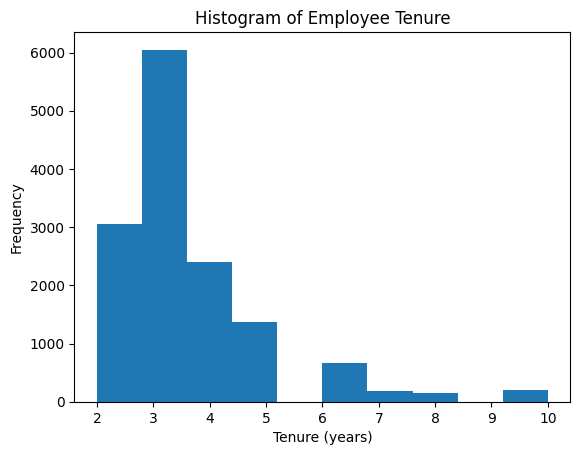

In [9]:
tenure = df["tenure"]
plt.hist(tenure, bins=10) # You can change the number of bins as you like
plt.xlabel("Tenure (years)") # Add x-axis label
plt.ylabel("Frequency") # Add y-axis label
plt.title("Histogram of Employee Tenure") # Add title
plt.show() # Show the plot

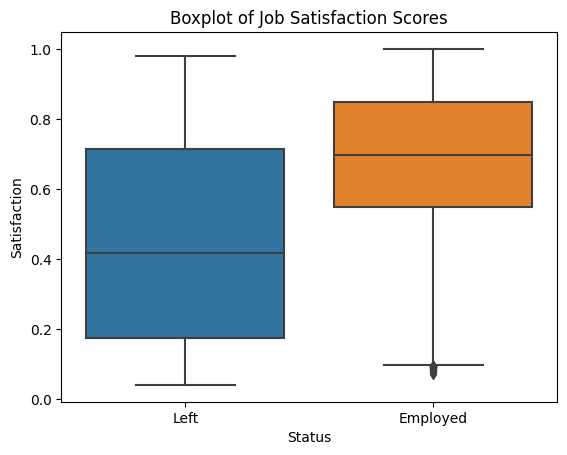

In [10]:
satisfaction = df["satisfaction"]
status = df["status"]
sns.boxplot(x="status", y="satisfaction", data=df)
plt.xlabel("Status") # Add x-axis label
plt.ylabel("Satisfaction") # Add y-axis label
plt.title("Boxplot of Job Satisfaction Scores") # Add title
plt.show() # Show the plot

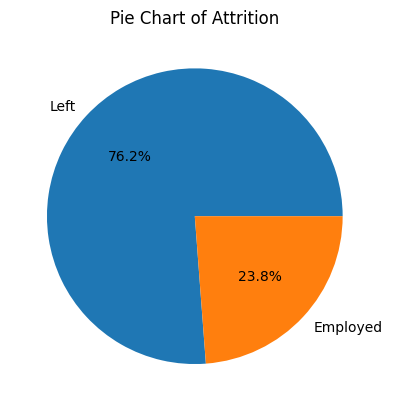

In [11]:
status = df["status"]

# Plot the pie chart
plt.pie(status.value_counts(), labels=status.unique(), autopct='%1.1f%%')
plt.title("Pie Chart of Attrition")
plt.show()

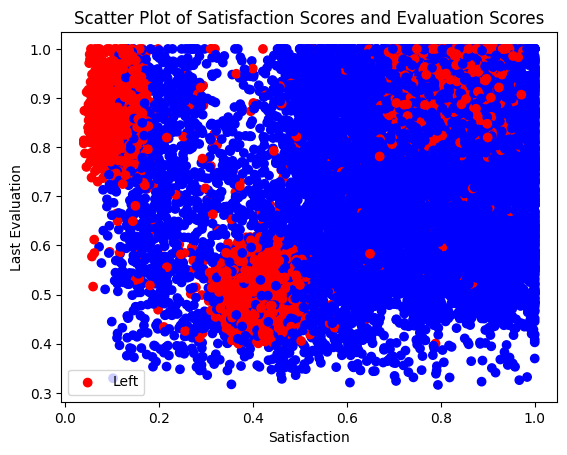

In [12]:
plt.scatter(df["satisfaction"], df["last_evaluation"], c=df["status"].map({"Left": "red", "Employed": "blue"}))
plt.xlabel("Satisfaction") # Add x-axis label
plt.ylabel("Last Evaluation") # Add y-axis label
plt.title("Scatter Plot of Satisfaction Scores and Evaluation Scores") # Add title
plt.legend(["Left", "Employed"]) # Add legend
plt.show() # Show the plot

In [13]:
for col in ['tenure', 'satisfaction']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [14]:
df.isnull().sum()


avg_monthly_hrs          0
department             709
filed_complaint      12191
last_evaluation       1532
n_projects               0
recently_promoted    13949
salary                   0
satisfaction             0
status                   0
tenure                   0
dtype: int64

In [15]:
df["status"] = df["status"].map({"Left": 0, "Employed": 1})

In [16]:
df["status"].dtype

dtype('int64')

In [17]:
# Select the features and the target variable
X = df[["tenure", "satisfaction", "n_projects"]] # Features
y = df["status"] # Target

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Build a decision tree classifier to predict employee attrition
# Use entropy as the split criterion and set the maximum depth to 3 for tree pruning
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf.fit(X_train, y_train) # Train the classifier on the training set


DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [20]:
# Predict the labels of the testing set
y_pred = clf.predict(X_test)

# Evaluate the model performance using accuracy score
acc = accuracy_score(y_test, y_pred)
print(f"The accuracy of the decision tree classifier is {acc:.2f}")

The accuracy of the decision tree classifier is 0.91


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
clf_gini = DecisionTreeClassifier(criterion="gini")
clf_gini.fit(X_train, y_train) # Train the classifier on the training set

DecisionTreeClassifier()

In [23]:
y_pred_gini = clf_gini.predict(X_test)

# Evaluate the model performance using accuracy score
acc_gini = accuracy_score(y_test, y_pred_gini)
print(f"The accuracy of the decision tree classifier with Gini impurity is {acc_gini:.2f}")

The accuracy of the decision tree classifier with Gini impurity is 0.94


In [24]:
# Build a decision tree classifier with entropy as the split criterion
clf_entropy = DecisionTreeClassifier(criterion="entropy")
clf_entropy.fit(X_train, y_train) # Train the classifier on the training set

# Predict the labels of the testing set using entropy
y_pred_entropy = clf_entropy.predict(X_test)

# Evaluate the model performance using accuracy score
acc_entropy = accuracy_score(y_test, y_pred_entropy)
print(f"The accuracy of the decision tree classifier with entropy is {acc_entropy:.2f}")


The accuracy of the decision tree classifier with entropy is 0.93


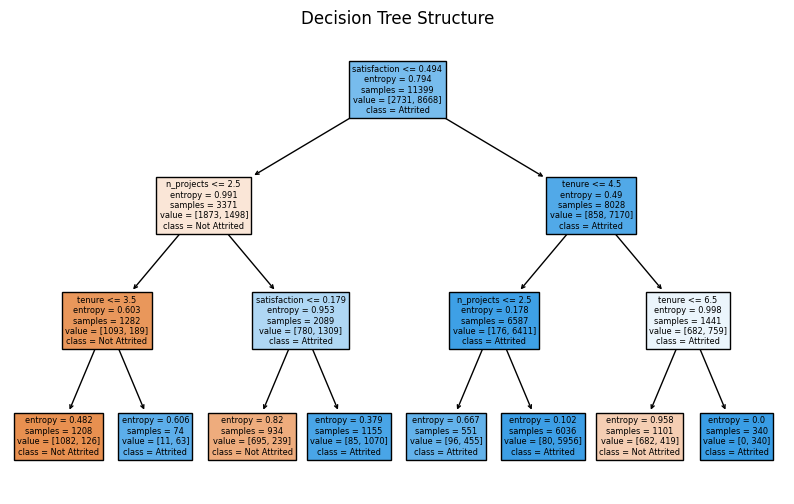

In [37]:
plt.figure(figsize=(10, 6))
plot_tree(clf, feature_names=X.columns, class_names=["Not Attrited", "Attrited"], filled=True)
plt.title("Decision Tree Structure")
plt.show()

In [38]:
depth = clf.get_depth()
print(f"The depth of the decision tree is: {depth}")

The depth of the decision tree is: 3


In [39]:
# Print the feature importances
feature_importances = clf.feature_importances_
feature_names = X.columns
importance_dict = dict(zip(feature_names, feature_importances))
sorted_importance_dict = dict(sorted(importance_dict.items(), key=lambda x: x[1], reverse=True))
print("Feature importances:")
for feature, importance in sorted_importance_dict.items():
    print(f"{feature}: {importance:.3f}")

Feature importances:
satisfaction: 0.494
tenure: 0.358
n_projects: 0.148


In [40]:
# Pruning using minimum leaf size
min_leaf_sizes = [1, 5, 10, 20]  # Different minimum leaf sizes to experiment with

for min_leaf in min_leaf_sizes:
    print(f"\nDecision Tree with Minimum Leaf Size = {min_leaf}")
    clf_min_leaf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=min_leaf)
    clf_min_leaf.fit(X_train, y_train)



Decision Tree with Minimum Leaf Size = 1

Decision Tree with Minimum Leaf Size = 5

Decision Tree with Minimum Leaf Size = 10

Decision Tree with Minimum Leaf Size = 20


In [42]:
  # Predict the labels of the testing set
y_pred_min_leaf = clf_min_leaf.predict(X_test)
# Evaluate the model performance using accuracy score
acc_min_leaf = accuracy_score(y_test, y_pred_min_leaf)
print(f"The accuracy of the decision tree with min_samples_leaf={min_leaf} is {acc_min_leaf:.2f}")


The accuracy of the decision tree with min_samples_leaf=20 is 0.96


In [43]:
# Pruning using maximum depth
max_depths = [3, 5, 7, 10]  # Different maximum depths to experiment with

for depth in max_depths:
    print(f"\nDecision Tree with Maximum Depth = {depth}")
    clf_max_depth = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf_max_depth.fit(X_train, y_train)




Decision Tree with Maximum Depth = 3

Decision Tree with Maximum Depth = 5

Decision Tree with Maximum Depth = 7

Decision Tree with Maximum Depth = 10


In [44]:
    y_pred_max_depth = clf_max_depth.predict(X_test)

    # Evaluate the model performance using accuracy score
    acc_max_depth = accuracy_score(y_test, y_pred_max_depth)
    print(f"The accuracy of the decision tree with max_depth={depth} is {acc_max_depth:.2f}")


The accuracy of the decision tree with max_depth=10 is 0.96


In [51]:
print("Evaluation of Decision Tree with Gini Impurity:")

for min_leaf in min_leaf_sizes:
    clf_min_leaf_gini = DecisionTreeClassifier(criterion="gini", min_samples_leaf=min_leaf)
    clf_min_leaf_gini.fit(X_train, y_train)

    y_pred_min_leaf_gini = clf_min_leaf_gini.predict(X_test)

    acc_min_leaf_gini = accuracy_score(y_test, y_pred_min_leaf_gini)
    precision_min_leaf_gini = precision_score(y_test, y_pred_min_leaf_gini, average='binary')
    recall_min_leaf_gini = recall_score(y_test, y_pred_min_leaf_gini, average='binary')
    f1_min_leaf_gini = f1_score(y_test, y_pred_min_leaf_gini, average='binary')

    print(f"Metrics for min_samples_leaf={min_leaf}:")
    print(f"  Accuracy: {acc_min_leaf_gini:.2f}")
    print(f"  Precision: {precision_min_leaf_gini:.2f}")
    print(f"  Recall: {recall_min_leaf_gini:.2f}")
    print(f"  F1 Score: {f1_min_leaf_gini:.2f}")
    print()

Evaluation of Decision Tree with Gini Impurity:
Metrics for min_samples_leaf=1:
  Accuracy: 0.93
  Precision: 0.96
  Recall: 0.95
  F1 Score: 0.96

Metrics for min_samples_leaf=5:
  Accuracy: 0.95
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97

Metrics for min_samples_leaf=10:
  Accuracy: 0.96
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97

Metrics for min_samples_leaf=20:
  Accuracy: 0.96
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97



In [52]:
# Pruning using maximum depth and evaluate metrics for Entropy
print("Evaluation of Decision Tree with Entropy:")

for depth in max_depths:
    clf_max_depth_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf_max_depth_entropy.fit(X_train, y_train)

    y_pred_max_depth_entropy = clf_max_depth_entropy.predict(X_test)

    acc_max_depth_entropy = accuracy_score(y_test, y_pred_max_depth_entropy)
    precision_max_depth_entropy = precision_score(y_test, y_pred_max_depth_entropy, average='binary', pos_label=1)  # Using pos_label=1 for 'Attrited'
    recall_max_depth_entropy = recall_score(y_test, y_pred_max_depth_entropy, average='binary', pos_label=1)  # Using pos_label=1 for 'Attrited'
    f1_max_depth_entropy = f1_score(y_test, y_pred_max_depth_entropy, average='binary', pos_label=1)  # Using pos_label=1 for 'Attrited'

    print(f"Metrics for max_depth={depth}:")
    print(f"  Accuracy: {acc_max_depth_entropy:.2f}")
    print(f"  Precision: {precision_max_depth_entropy:.2f}")
    print(f"  Recall: {recall_max_depth_entropy:.2f}")
    print(f"  F1 Score: {f1_max_depth_entropy:.2f}")
    print()

Evaluation of Decision Tree with Entropy:
Metrics for max_depth=3:
  Accuracy: 0.91
  Precision: 0.97
  Recall: 0.91
  F1 Score: 0.94

Metrics for max_depth=5:
  Accuracy: 0.95
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97

Metrics for max_depth=7:
  Accuracy: 0.96
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97

Metrics for max_depth=10:
  Accuracy: 0.96
  Precision: 0.97
  Recall: 0.97
  F1 Score: 0.97



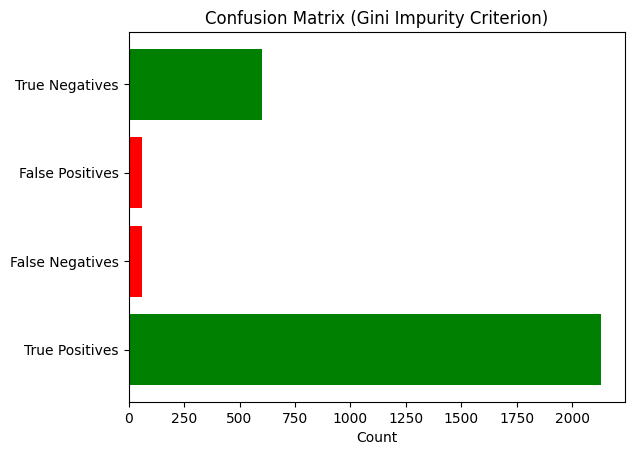

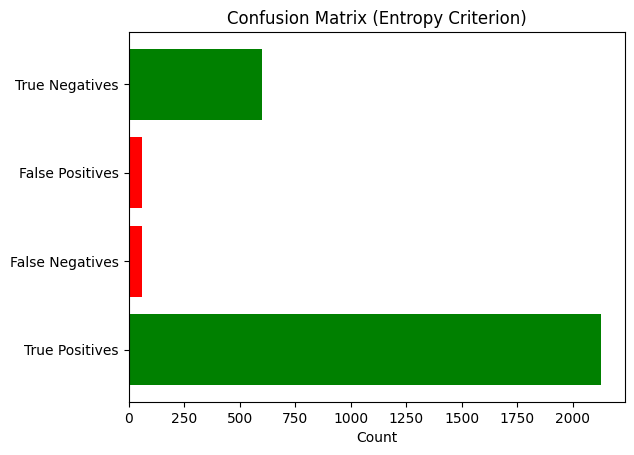

In [54]:
# Function to plot the confusion matrix as a diverging bar chart
def plot_confusion_matrix(y_true, y_pred, criterion_name):
    cm = confusion_matrix(y_true, y_pred)
    categories = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    fig, ax = plt.subplots()

    # Calculate positions for bars on X-axis
    x = np.arange(len(categories))

    ax.barh(x, cm.ravel(), color=['green', 'red', 'red', 'green'])
    ax.set_yticks(x)
    ax.set_yticklabels(categories)
    ax.invert_yaxis()  # Invert y-axis for better visualization
    ax.set_xlabel('Count')
    ax.set_title(f'Confusion Matrix ({criterion_name} Criterion)')

    plt.show()

# Plot confusion matrix for Gini impurity
plot_confusion_matrix(y_test, y_pred_min_leaf_gini, 'Gini Impurity')

# Plot confusion matrix for entropy
plot_confusion_matrix(y_test, y_pred_max_depth_entropy, 'Entropy')

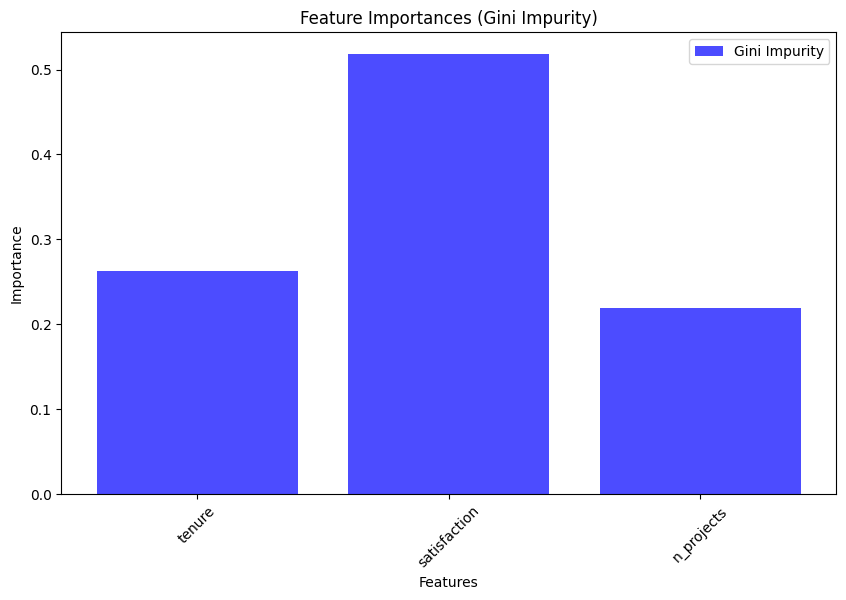

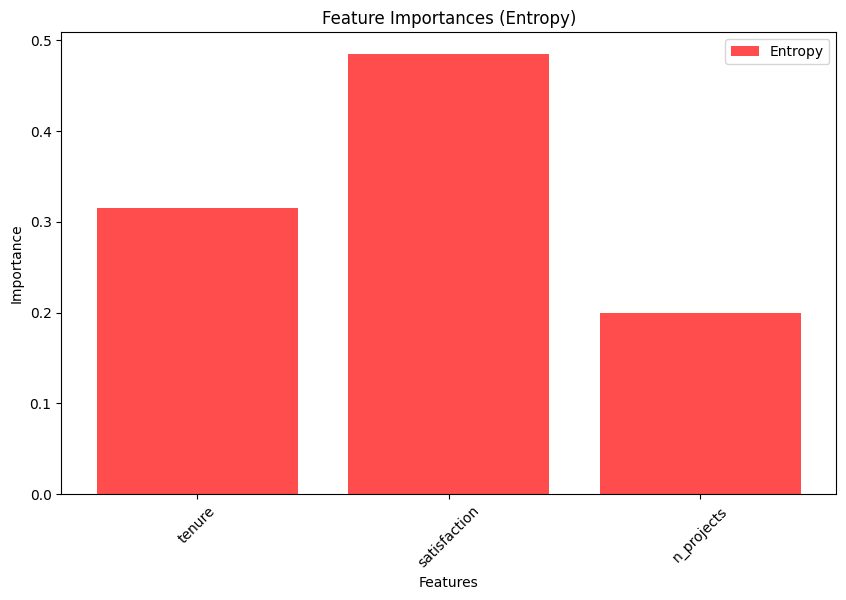

In [55]:
feature_importances_gini = clf_min_leaf_gini.feature_importances_

# Calculate feature importances for entropy
feature_importances_entropy = clf_max_depth_entropy.feature_importances_

# Plot feature importances for Gini impurity
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances_gini, color='b', alpha=0.7, label='Gini Impurity')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances (Gini Impurity)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Plot feature importances for entropy
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importances_entropy, color='r', alpha=0.7, label='Entropy')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances (Entropy)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [56]:
print("Evaluation of Decision Tree with Gini Impurity:")

best_accuracy_gini = 0
best_min_leaf_gini = None

for min_leaf in min_leaf_sizes:
    clf_min_leaf_gini = DecisionTreeClassifier(criterion="gini", min_samples_leaf=min_leaf)
    clf_min_leaf_gini.fit(X_train, y_train)

    y_pred_min_leaf_gini = clf_min_leaf_gini.predict(X_test)

    acc_min_leaf_gini = accuracy_score(y_test, y_pred_min_leaf_gini)

    if acc_min_leaf_gini > best_accuracy_gini:
        best_accuracy_gini = acc_min_leaf_gini
        best_min_leaf_gini = min_leaf

    print(f"Accuracy for min_samples_leaf={min_leaf}: {acc_min_leaf_gini:.2f}")

print(f"\nBest accuracy with Gini Impurity: {best_accuracy_gini:.2f} (min_samples_leaf={best_min_leaf_gini})")

# Pruning using maximum depth and evaluate metrics for Entropy
print("\nEvaluation of Decision Tree with Entropy:")

best_accuracy_entropy = 0
best_max_depth_entropy = None

for depth in max_depths:
    clf_max_depth_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    clf_max_depth_entropy.fit(X_train, y_train)

    y_pred_max_depth_entropy = clf_max_depth_entropy.predict(X_test)

    acc_max_depth_entropy = accuracy_score(y_test, y_pred_max_depth_entropy)

    if acc_max_depth_entropy > best_accuracy_entropy:
        best_accuracy_entropy = acc_max_depth_entropy
        best_max_depth_entropy = depth

    print(f"Accuracy for max_depth={depth}: {acc_max_depth_entropy:.2f}")

print(f"\nBest accuracy with Entropy: {best_accuracy_entropy:.2f} (max_depth={best_max_depth_entropy})")

Evaluation of Decision Tree with Gini Impurity:
Accuracy for min_samples_leaf=1: 0.94
Accuracy for min_samples_leaf=5: 0.95
Accuracy for min_samples_leaf=10: 0.96
Accuracy for min_samples_leaf=20: 0.96

Best accuracy with Gini Impurity: 0.96 (min_samples_leaf=20)

Evaluation of Decision Tree with Entropy:
Accuracy for max_depth=3: 0.91
Accuracy for max_depth=5: 0.95
Accuracy for max_depth=7: 0.96
Accuracy for max_depth=10: 0.96

Best accuracy with Entropy: 0.96 (max_depth=7)
